# Laboratorio 7 filtrado de ECG
Para el filtrado seleccionamos la señal de EKG del sujeto 3 activo del Laboratorio de ECG


### FILTRADO DE ECG  de Sujeto 3 activo

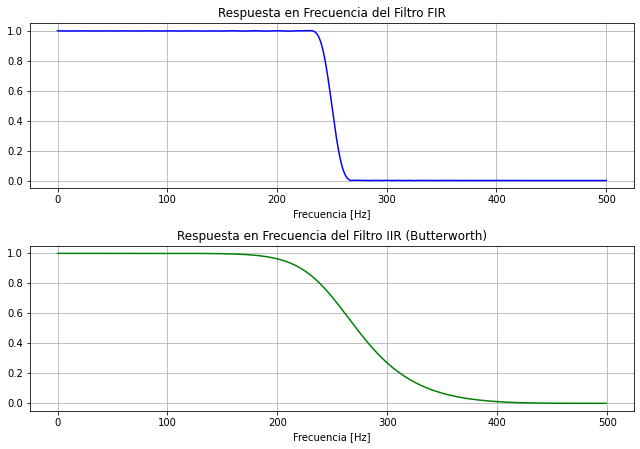

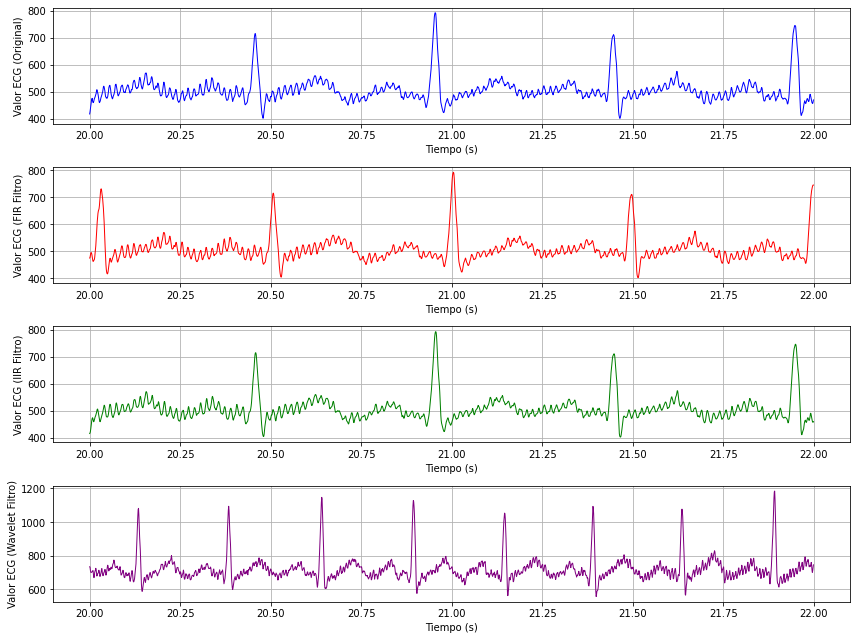

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter, iirfilter, butter
import pywt

# Cargar los datos desde el archivo TXT
archivo_txt = "S3activocorregido.txt"
datos_emg = np.loadtxt(archivo_txt)
ecg = datos_emg[:, 5]  # Sexta columna

# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000
tiempo = np.arange(len(ecg)) / frecuencia_muestreo

# Frecuencia de corte de los filtros
cutoff_frequency_fir = 0.5
cutoff_frequency_iir = 0.5

# Diseñar filtros
num_taps = 101
fir_filter = firwin(num_taps, cutoff_frequency_fir)
iir_filter = iirfilter(N=4, Wn=cutoff_frequency_iir, btype='low', ftype='butter')
wavelet_filter = 'db4'

# Respuesta en frecuencia del filtro FIR
w, h = freqz(fir_filter, worN=8000)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

# Respuesta en frecuencia del filtro IIR (Butterworth)
w, h = freqz(*butter(4, cutoff_frequency_iir, btype='low'))
plt.subplot(3, 1, 2)
plt.plot(0.5*frecuencia_muestreo*w/np.pi, np.abs(h), 'g')
plt.title('Respuesta en Frecuencia del Filtro IIR (Butterworth)')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)
plt.tight_layout()
# El filtro Wavelet no es un filtro en el dominio de la frecuencia 


# Aplicar los filtros
ecg_fir = lfilter(fir_filter, 1.0, ecg)
ecg_iir = lfilter(iir_filter[0], iir_filter[1], ecg)
ecg_wavelet, _ = pywt.dwt(ecg, wavelet_filter)

# Define el intervalo de tiempo que deseas visualizar (segundos)
inicio_segundo = 20
fin_segundo = 22
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Crear gráficos de las señales filtradas
plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 1)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg[inicio_muestra:fin_muestra], lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (Original)')
plt.grid(True)


plt.subplot(4, 1, 2)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_fir[inicio_muestra:fin_muestra], lw=1, color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (FIR Filtro)')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_iir[inicio_muestra:fin_muestra], lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (IIR Filtro)')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(tiempo[inicio_muestra:fin_muestra], ecg_wavelet[inicio_muestra:fin_muestra], lw=1, color='purple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (Wavelet Filtro)')
plt.grid(True)

plt.tight_layout()
plt.show()


Intentos: 


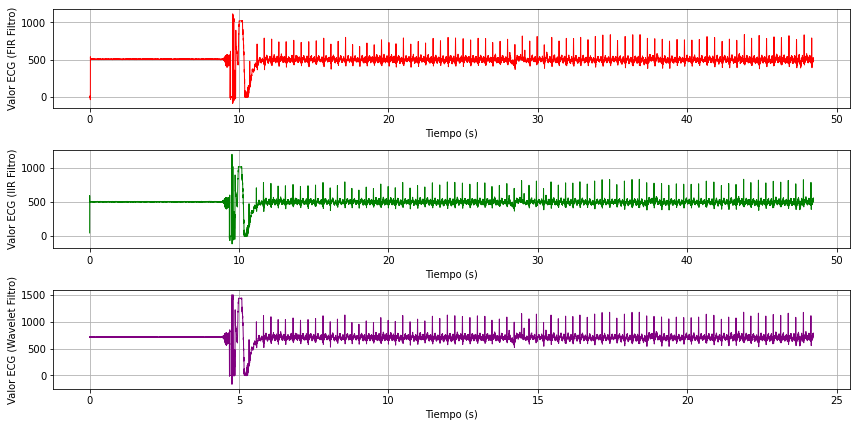

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, iirfilter
import pywt

# Cargar los datos desde el archivo TXT
archivo_txt = "S3activocorregido.txt"
datos_emg = np.loadtxt(archivo_txt)
columna_sexta = datos_emg[:, 5]  # Sexta columna

# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000
tiempo = np.arange(len(columna_sexta)) / frecuencia_muestreo

# Diseñar filtros
cutoff_frequency_fir = 0.5
num_taps = 101
fir_filter = firwin(num_taps, cutoff_frequency_fir)
iir_filter = iirfilter(N=4, Wn=0.5, btype='low', ftype='butter')
wavelet_filter = 'db4'

# Aplicar los filtros
columna_sexta_fir = lfilter(fir_filter, 1.0, columna_sexta)
columna_sexta_iir = lfilter(iir_filter[0], iir_filter[1], columna_sexta)
# Aplicar el filtro Wavelet
columna_sexta_wavelet, _ = pywt.dwt(columna_sexta, wavelet_filter)
tiempo_wavelet = np.arange(len(columna_sexta_wavelet)) / frecuencia_muestreo

# Crear gráficos para cada filtro
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(tiempo, columna_sexta_fir, lw=1, color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (FIR Filtro)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(tiempo, columna_sexta_iir, lw=1, color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (IIR Filtro)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(tiempo_wavelet, columna_sexta_wavelet, lw=1, color='purple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG (Wavelet Filtro)')
plt.grid(True)

plt.tight_layout()
plt.show()


## ECG DE PROSIM


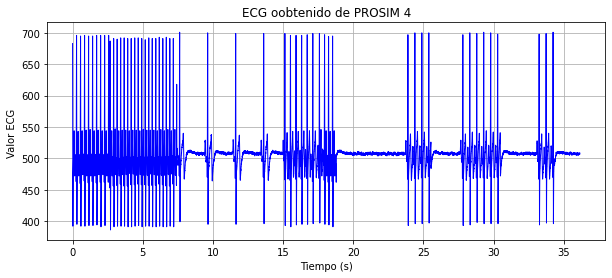

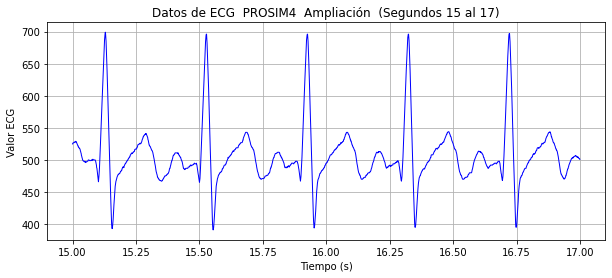

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Nombre de tu archivo TXT
archivo_txt = "ECGdePROSIM4.txt"

# Cargar los datos desde el archivo TXT
datos_emg = np.loadtxt(archivo_txt)

# Extraer la sexta columna de datos_emg
# recordamos que el archivo txt me da informacion de todas las entradas del bitalino pero 
# la única que nos interesa es la que se encuentra en el encabezado A1
columna_sexta = datos_emg[:, 5]  # El índice 5 representa la sexta columna (0-indexed)

# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
tiempo = np.arange(len(columna_sexta)) / frecuencia_muestreo

# Definir el intervalo de tiempo que deseas graficar (segundos 6 al 7)
inicio_segundo = 15
fin_segundo = 17
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Extraer los datos del intervalo de tiempo especificado
tiempo_intervalo = tiempo[inicio_muestra:fin_muestra]
columna_intervalo = columna_sexta[inicio_muestra:fin_muestra]

# Crear el gráfico
plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico según tus necesidades
plt.plot(tiempo, columna_sexta, lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG ')
plt.title('ECG oobtenido de PROSIM 4')
plt.grid(True)

# Mostrar el gráfico
plt.show()


# Crear el gráfico para los datos del intervalo de tiempo especificado
#esto nos permite visualizar de mejor manera los datos
plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico según tus necesidades
plt.plot(tiempo_intervalo, columna_intervalo, lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG')
plt.title('Datos de ECG  PROSIM4  Ampliación  (Segundos 15 al 17)')
plt.grid(True)

# Mostrar el gráfico
plt.show()


## ECG PROSIM PARO CARDIACO

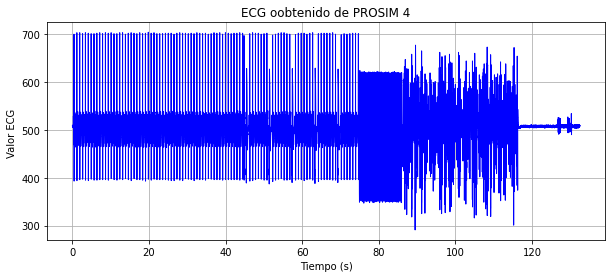

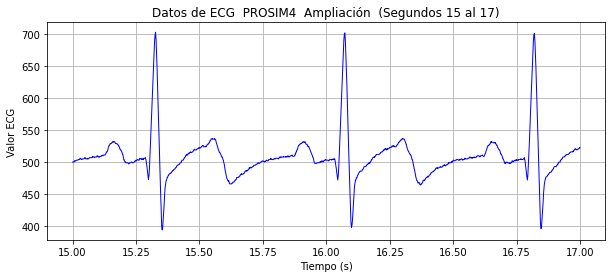

In [9]:

import numpy as np
import matplotlib.pyplot as plt

# Nombre de tu archivo TXT
archivo_txt = "PAROCARDIACOPROSIM4.txt"

# Cargar los datos desde el archivo TXT
datos_emg = np.loadtxt(archivo_txt)

# Extraer la sexta columna de datos_emg
# recordamos que el archivo txt me da informacion de todas las entradas del bitalino pero 
# la única que nos interesa es la que se encuentra en el encabezado A1
columna_sexta = datos_emg[:, 5]  # El índice 5 representa la sexta columna (0-indexed)

# Crear un arreglo de tiempo en segundos
frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
tiempo = np.arange(len(columna_sexta)) / frecuencia_muestreo

# Definir el intervalo de tiempo que deseas graficar (segundos 6 al 7)
inicio_segundo = 15
fin_segundo = 17
inicio_muestra = int(inicio_segundo * frecuencia_muestreo)
fin_muestra = int(fin_segundo * frecuencia_muestreo)

# Extraer los datos del intervalo de tiempo especificado
tiempo_intervalo = tiempo[inicio_muestra:fin_muestra]
columna_intervalo = columna_sexta[inicio_muestra:fin_muestra]

# Crear el gráfico
plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico según tus necesidades
plt.plot(tiempo, columna_sexta, lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG ')
plt.title('ECG oobtenido de PROSIM 4')
plt.grid(True)

# Mostrar el gráfico
plt.show()


# Crear el gráfico para los datos del intervalo de tiempo especificado
#esto nos permite visualizar de mejor manera los datos
plt.figure(figsize=(10, 4))  # Ajusta el tamaño del gráfico según tus necesidades
plt.plot(tiempo_intervalo, columna_intervalo, lw=1, color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor ECG')
plt.title('Datos de ECG  PROSIM4  Ampliación  (Segundos 15 al 17)')
plt.grid(True)

# Mostrar el gráfico
plt.show()
